In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import nltk


from nltk.tokenize import word_tokenize  # Split sentence into words and keep those words in form of a list
from keras.preprocessing.text import Tokenizer  # Converts words into numeric values
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Equals all the sentences by filling 0
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sachin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords

In [5]:
stpwrds=stopwords.words('english')

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sachin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
twit=pd.read_csv(r"training.1600000.processed.noemoticon.csv", encoding='latin-1', header=None).sample(frac=0.05).reset_index()

In [8]:
twit

,index,0,1,2,3,4,5
0,668398,0,2245920843,Fri Jun 19 16:50:02 PDT 2009,NO_QUERY,smellyocheese,I fell asleep with my makeup on
1,1144666,4,1977656935,Sat May 30 21:25:13 PDT 2009,NO_QUERY,Veronicaleigh,We decided to head tome tonight watch out Bel...
2,12539,0,1551867108,Sat Apr 18 10:10:39 PDT 2009,NO_QUERY,fryfan20,"@BertaWooster no, don't think it is"
3,160964,0,1957186411,Thu May 28 23:45:44 PDT 2009,NO_QUERY,ItsIMANIrose,@professor12 gray! .... i so feel neglected
4,1381570,4,2052377265,Sat Jun 06 00:31:37 PDT 2009,NO_QUERY,DaysiJazmin,Anywho Tomorow is Movie Night @ Courtney's
...,...,...,...,...,...,...,...
79995,200817,0,1971755047,Sat May 30 07:49:37 PDT 2009,NO_QUERY,ChelseyHart,@tommcfly UK is pretty sunny today aswell! Don...
79996,400336,0,2057384652,Sat Jun 06 12:54:21 PDT 2009,NO_QUERY,megaman51,@bubblegumneko thats exactly what i wanted to ...
79997,549949,0,2202786119,Tue Jun 16 22:24:48 PDT 2009,NO_QUERY,Jillybeenc,I can not get over exactly how many bunnies I ...
79998,1174069,4,1980897008,Sun May 31 07:56:47 PDT 2009,NO_QUERY,Nakpangi,"@1SHAWNL yes, you should go!"


In [9]:
twit.columns = ['index','sentiment', 'id', 'date', 'query', 'user_name', 'tweet']

In [10]:
twit

,index,sentiment,id,date,query,user_name,tweet
0,668398,0,2245920843,Fri Jun 19 16:50:02 PDT 2009,NO_QUERY,smellyocheese,I fell asleep with my makeup on
1,1144666,4,1977656935,Sat May 30 21:25:13 PDT 2009,NO_QUERY,Veronicaleigh,We decided to head tome tonight watch out Bel...
2,12539,0,1551867108,Sat Apr 18 10:10:39 PDT 2009,NO_QUERY,fryfan20,"@BertaWooster no, don't think it is"
3,160964,0,1957186411,Thu May 28 23:45:44 PDT 2009,NO_QUERY,ItsIMANIrose,@professor12 gray! .... i so feel neglected
4,1381570,4,2052377265,Sat Jun 06 00:31:37 PDT 2009,NO_QUERY,DaysiJazmin,Anywho Tomorow is Movie Night @ Courtney's
...,...,...,...,...,...,...,...
79995,200817,0,1971755047,Sat May 30 07:49:37 PDT 2009,NO_QUERY,ChelseyHart,@tommcfly UK is pretty sunny today aswell! Don...
79996,400336,0,2057384652,Sat Jun 06 12:54:21 PDT 2009,NO_QUERY,megaman51,@bubblegumneko thats exactly what i wanted to ...
79997,549949,0,2202786119,Tue Jun 16 22:24:48 PDT 2009,NO_QUERY,Jillybeenc,I can not get over exactly how many bunnies I ...
79998,1174069,4,1980897008,Sun May 31 07:56:47 PDT 2009,NO_QUERY,Nakpangi,"@1SHAWNL yes, you should go!"


In [11]:
twit.drop(['index','id', 'date', 'query', 'user_name'], inplace=True, axis=1)

In [12]:
twit

,sentiment,tweet
0,0,I fell asleep with my makeup on
1,4,We decided to head tome tonight watch out Bel...
2,0,"@BertaWooster no, don't think it is"
3,0,@professor12 gray! .... i so feel neglected
4,4,Anywho Tomorow is Movie Night @ Courtney's
...,...,...
79995,0,@tommcfly UK is pretty sunny today aswell! Don...
79996,0,@bubblegumneko thats exactly what i wanted to ...
79997,0,I can not get over exactly how many bunnies I ...
79998,4,"@1SHAWNL yes, you should go!"


In [13]:
twit.sentiment.value_counts()

4    40147
0    39853
Name: sentiment, dtype: int64

In [14]:
plt.show()

In [15]:
t = twit['tweet'][0]
print(t)
print("<======================>")
print(word_tokenize(t))

I fell asleep with my makeup on 
<======================>
['I', 'fell', 'asleep', 'with', 'my', 'makeup', 'on']


In [16]:
corpus=[]
for text in twit['tweet']:
    words = [word.lower() for word in word_tokenize(text)]
    corpus.append(words)

In [17]:
num_words=len(corpus)
print(num_words)

80000


In [18]:
twit.shape

(80000, 2)

In [19]:
twit['tweet']=twit['tweet'].str.lower()

In [20]:
twit

,sentiment,tweet
0,0,i fell asleep with my makeup on
1,4,we decided to head tome tonight watch out bel...
2,0,"@bertawooster no, don't think it is"
3,0,@professor12 gray! .... i so feel neglected
4,4,anywho tomorow is movie night @ courtney's
...,...,...
79995,0,@tommcfly uk is pretty sunny today aswell! don...
79996,0,@bubblegumneko thats exactly what i wanted to ...
79997,0,i can not get over exactly how many bunnies i ...
79998,4,"@1shawnl yes, you should go!"


In [21]:
# Removing stopwords from the review column
twit['tweet']=twit['tweet'].apply(lambda x:" ".join(word for word in x.split() if word not in stpwrds))

In [22]:
twit

,sentiment,tweet
0,0,fell asleep makeup
1,4,decided head tome tonight watch bellevue haha ...
2,0,"@bertawooster no, think"
3,0,@professor12 gray! .... feel neglected
4,4,anywho tomorow movie night @ courtney's
...,...,...
79995,0,@tommcfly uk pretty sunny today aswell! forget...
79996,0,@bubblegumneko thats exactly wanted hear.
79997,0,get exactly many bunnies saw uvic today! thoug...
79998,4,"@1shawnl yes, go!"


In [23]:
import string # special operations on strings like removing the punctuations from the sentences
def remove_punc(text):
    no_punc= text.translate(str.maketrans('', '', string.punctuation))
    return no_punc

In [24]:
twit['tweet']=twit['tweet'].apply(remove_punc)

In [25]:
twit

,sentiment,tweet
0,0,fell asleep makeup
1,4,decided head tome tonight watch bellevue haha ...
2,0,bertawooster no think
3,0,professor12 gray feel neglected
4,4,anywho tomorow movie night courtneys
...,...,...
79995,0,tommcfly uk pretty sunny today aswell forget f...
79996,0,bubblegumneko thats exactly wanted hear
79997,0,get exactly many bunnies saw uvic today though...
79998,4,1shawnl yes go


In [26]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
twit['sentiment']=en.fit_transform(twit['sentiment'])

In [27]:
twit

,sentiment,tweet
0,0,fell asleep makeup
1,1,decided head tome tonight watch bellevue haha ...
2,0,bertawooster no think
3,0,professor12 gray feel neglected
4,1,anywho tomorow movie night courtneys
...,...,...
79995,0,tommcfly uk pretty sunny today aswell forget f...
79996,0,bubblegumneko thats exactly wanted hear
79997,0,get exactly many bunnies saw uvic today though...
79998,1,1shawnl yes go


In [28]:
X=twit['tweet']
y=twit['sentiment']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=5)

In [30]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000,), (60000,), (20000,), (20000,))

In [31]:
tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train, maxlen = 30, truncating = 'post', padding='post')

In [32]:
x_train[1], len(x_train[1])

(array([19295,  1506,   445, 19296,    17,   919,   197,  1043, 19297,
         6749,  9422,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0]),
 30)

In [33]:
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, maxlen = 30, truncating = 'post', padding='post')

In [34]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 30), (60000,), (20000, 30), (20000,))

In [35]:
model =  Sequential()

model.add(Embedding(input_dim=num_words, output_dim = 32, input_length=30))
model.add(LSTM(100, dropout=0.1, return_sequences=True))
model.add(LSTM(100, dropout=0.1))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 32)            2560000   
                                                                 
 lstm (LSTM)                 (None, 30, 100)           53200     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,693,701
Trainable params: 2,693,701
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [38]:
H = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/100
235/235 [==============================] - 69s 272ms/step - loss: 0.5704 - accuracy: 0.6871 - val_loss: 0.5086 - val_accuracy: 0.7552
Epoch 2/100
235/235 [==============================] - 65s 276ms/step - loss: 0.3888 - accuracy: 0.8324 - val_loss: 0.5215 - val_accuracy: 0.7445
Epoch 3/100
235/235 [==============================] - 65s 277ms/step - loss: 0.2508 - accuracy: 0.9011 - val_loss: 0.7069 - val_accuracy: 0.7175
Epoch 4/100
235/235 [==============================] - 65s 277ms/step - loss: 0.1709 - accuracy: 0.9338 - val_loss: 0.7795 - val_accuracy: 0.7106
Epoch 5/100
235/235 [==============================] - 66s 281ms/step - loss: 0.1319 - accuracy: 0.9484 - val_loss: 0.8598 - val_accuracy: 0.7156
Epoch 6/100
235/235 [==============================] - 65s 278ms/step - loss: 0.1091 - accuracy: 0.9567 - val_loss: 0.9737 - val_accuracy: 0.7127
Epoch 6: early stopping


In [39]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

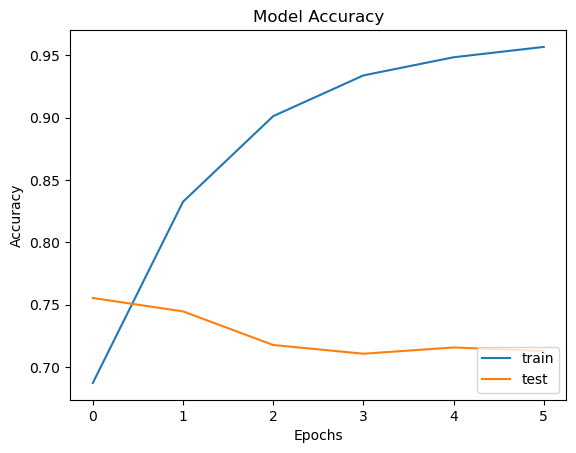

In [40]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

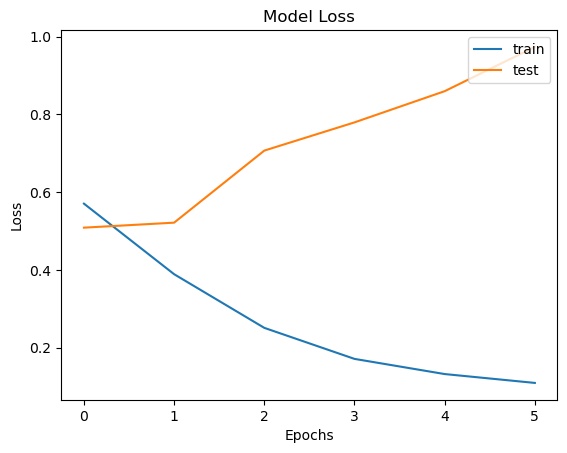

In [41]:
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [42]:
model.evaluate(x_test, y_test)

625/625 [==============================] - 11s 18ms/step - loss: 0.9737 - accuracy: 0.7127


[0.9736921191215515, 0.7127000093460083]

In [43]:
model.save("Sentiment Analysis")

INFO:tensorflow:Assets written to: Sentiment Analysis\assets


INFO:tensorflow:Assets written to: Sentiment Analysis\assets


In [44]:
# CONCLUSION:- USEFUL IN
#     1 Stock Price Prediction
#     2 Political Party uses to make Election Compaign Strategy
#     3 Company make Advertisining Strategy in terms of Cost and Profit 
#     4 Consumer Behaviour Analysis